In [1]:
%matplotlib inline
#%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import collections  as mc
import matplotlib.dates as mdates
import numpy as np
from datetime import timedelta
import matplotlib.dates as mdates



In [2]:
# about experiment
#data = pd.read_csv('exp_simple_sleep/jobs.csv')
data = pd.read_csv('exp_high_capacity_jobs/jobs.csv')

In [3]:
# truncate micro and nano seconds so that we create seconds level buckets
# This is how we detect overlap of parallel jobs per-node
data['started_datetime'] = pd.to_datetime(data.started).apply(lambda t: t.replace(microsecond=0, nanosecond=0))
data['finished_datetime'] = pd.to_datetime(data.finished).apply(lambda t: t.replace(microsecond=0, nanosecond=0))

subset = data[['execution_node', 'started_datetime', 'finished_datetime', 'id']]
data['duration_datetime'] = [pd.date_range(e[1], e[2], freq='1S') for e in subset.values]

In [4]:
# De-normalize the date ranges in 1 second buckets
subset = data[['execution_node', 'started_datetime', 'finished_datetime', 'id', 'duration_datetime']]

inflated = {
    'execution_node': [],
    'time': [],
    'id': [],
}
for d in subset.values:
    #print(d[0])
    for t in d[4]:
        inflated['execution_node'].append(d[0])
        inflated['time'].append(t)
        inflated['id'].append(d[3])
df = pd.DataFrame(data=inflated)

In [5]:
# For each second, calculate the number of running jobs.
df2 = df.groupby(['time','execution_node']).size().reset_index().rename(columns={0:'running_jobs_count'})
df2.sort_values('running_jobs_count', ascending=False)

,time,execution_node,running_jobs_count
531,2018-05-21 17:07:47,awx-1-t39w2,2
292,2018-05-21 17:06:30,awx-1-t39w2,2
1790,2018-05-21 17:14:52,awx-1-2x0tf,2
1793,2018-05-21 17:14:53,awx-1-2x0tf,2
768,2018-05-21 17:09:14,awx-1-t39w2,2
298,2018-05-21 17:06:32,awx-1-t39w2,2
295,2018-05-21 17:06:31,awx-1-t39w2,2
1347,2018-05-21 17:12:26,awx-1-b9fd8,2
289,2018-05-21 17:06:29,awx-1-t39w2,2
97,2018-05-21 17:05:25,awx-1-2x0tf,2


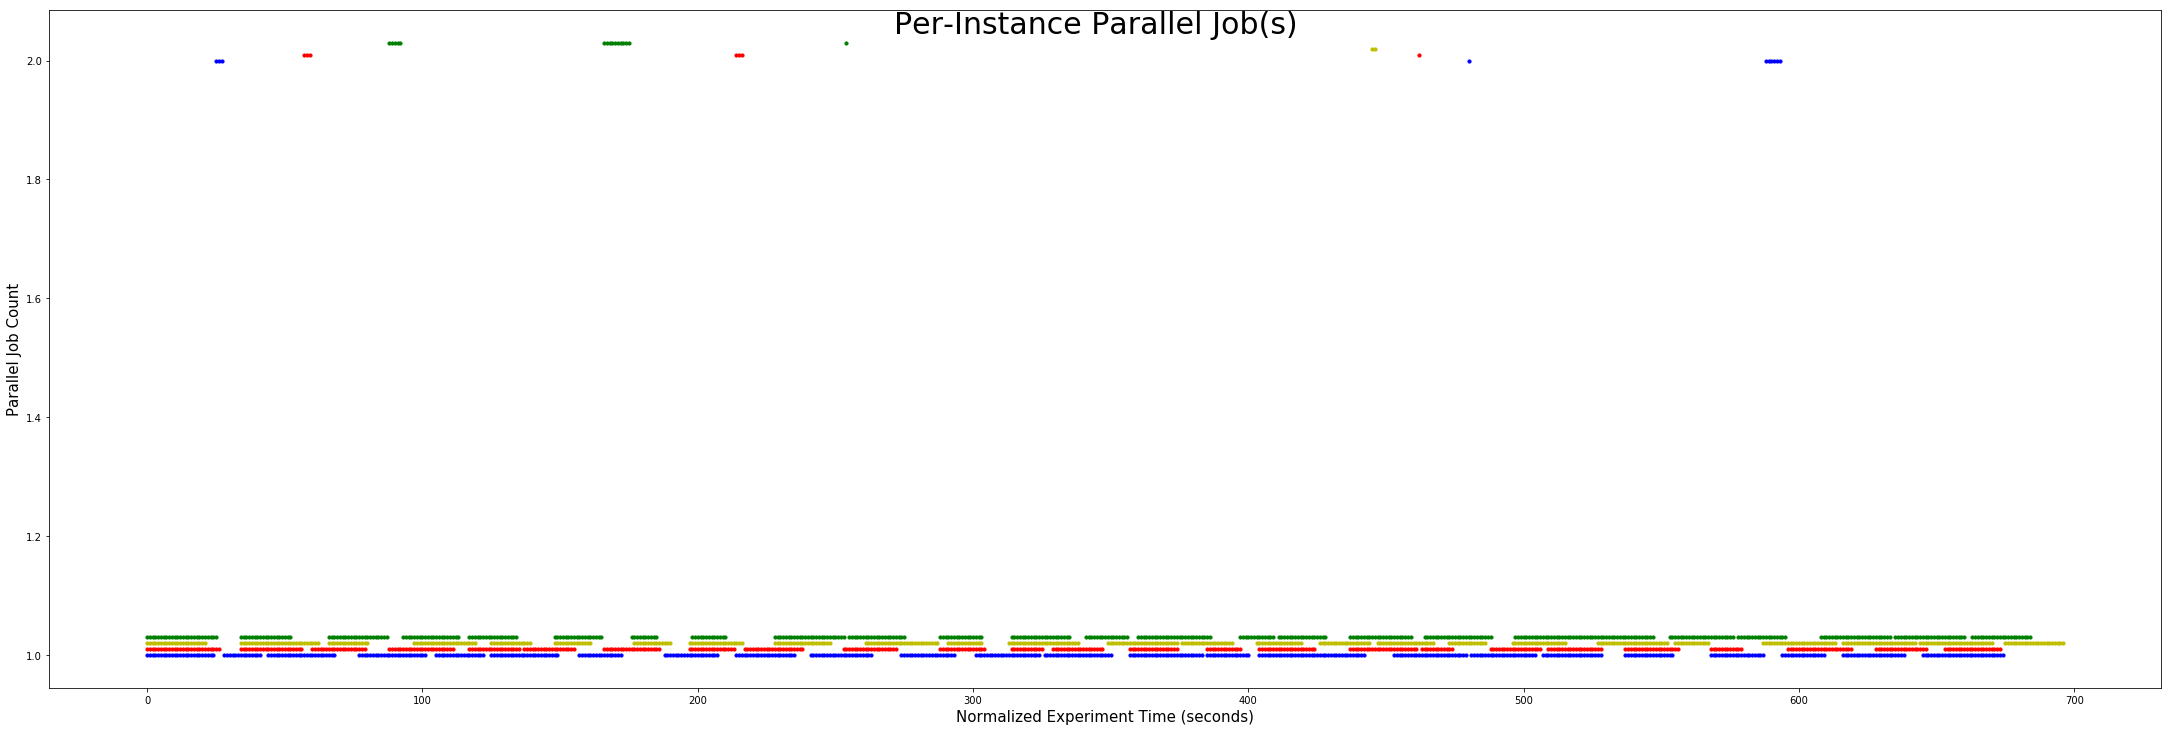

In [46]:
plt.rcParams['figure.figsize'] = [30, 10]

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')

execution_nodes = df2['execution_node'].unique()

fig, ax = plt.subplots()

colors = ['b', 'r', 'y', 'g']
time_1 = df2['time'][0].to_pydatetime()

for index in range(0, len(execution_nodes)):
    node = execution_nodes[index]
    
    x_values = df2[df2.execution_node == node]['time'].dt.to_pydatetime()
    y_values = df2[df2.execution_node == node]['running_jobs_count']
    y_values = [y + (index*.01) for y in y_values]
    #x_values = [x + timedelta(seconds=count*50) for x in x_values]
    x_values = [(x - time_1).total_seconds() for x in x_values]
    scatter = ax.scatter(x_values, y_values, s=10, c=colors[index], label=node)
    #autolabel(bar)

#plt.xticks(x_values)
plt.tight_layout()
plt.suptitle('Per-Instance Parallel Job(s)', fontsize=30)
plt.xlabel('Normalized Experiment Time (seconds)', fontsize=15)
plt.ylabel('Parallel Job Count', fontsize=15)

plt.show()